In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('fullwidth.mplstyle')
cmap = matplotlib.colormaps.get('tab10').colors

C:\Users\steph\AppData\Local\Temp\ipykernel_14608\67192530.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(2*sp.j1(arg)/arg)
C:\Users\steph\AppData\Local\Temp\ipykernel_14608\67192530.py:6: RuntimeWarning: invalid value encountered in divide
  return np.abs(2*sp.j1(arg)/arg)


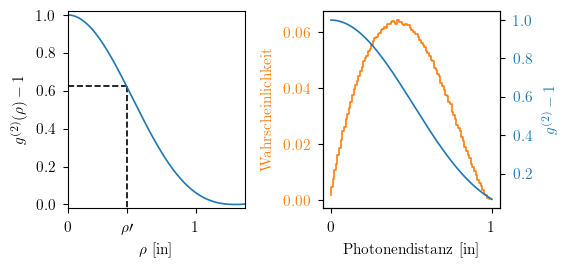

In [17]:
pinhole_diameter = 30e-6 #m
distance_to_observer = 1.75 #m
wavelength = 465e-9 #m
def g1_abs(d, pinhole_diameter):
    arg = np.pi*d*pinhole_diameter/(distance_to_observer*wavelength)
    return np.abs(2*sp.j1(arg)/arg)
fig,ax = plt.subplots(ncols=2, figsize=(5.8,2.81)) # Make figure a bit wider, else it looks weird

#%run simulations/spatial_simulation.py # do the simulation
hist, bins = np.histogram(d, bins=100, density=True)
ax[1].step(bins[:-1]*0.1, hist,  color=cmap[1])
ax[1].set(xlabel="Photonendistanz [in]", xticks=[0,2.54], xticklabels=['0','1'])
ax[1].set_ylabel("Wahrscheinlichkeit", color=cmap[1])
ax[1].tick_params(axis='y', labelcolor=cmap[1])

ax2 = ax[1].twinx()
xplot = np.arange(0.01,2*oeffnungsradius,0.01)
ax2.plot(xplot*0.1, g2(xplot), c=cmap[0])
ax2.set_ylabel("$g^{(2)}-1$", color=cmap[0])
ax2.tick_params(axis='y', labelcolor=cmap[0])

dist = np.linspace(0,0.12,2000)
# Test values until they hit g2 function
d_plot = np.array([d for d in dist if g1_abs(d, pinhole_diameter)**2 > np.mean(t)])
ax[0].plot(d_plot*100, np.mean(t)*np.ones_like(d_plot), linestyle='--', color='black')
ax[0].plot((d_plot[-1]*100, d_plot[-1]*100), (-0.5, np.mean(t)), linestyle='--', color='black')
ax[0].plot(dist*100, g1_abs(dist, pinhole_diameter)**2)

ax[0].set(xlabel='$\\rho$ [in]', ylabel='$g^{(2)}(\\rho) -1$',xlim=(0,3.5), ylim=(-0.02,1.02), xticks=[0, d_plot[-1]*100, 2.54], xticklabels=['0','$\\rho\\prime$','1'])
fig.tight_layout()
fig.savefig('latex/images/Aufbau/g2(rho).pdf', bbox_inches='tight')